## Problema
Prever ocorrência de diabetes criando um modelo com 70% de acurácia.

O dataset utilizado pode ser encontrado no seguinte link:
https://www.kaggle.com/uciml/pima-indians-diabetes-database/data



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler  

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
%matplotlib inline

In [2]:
df = pd.read_csv('diabetes.csv')
#Verficar o formato do dataset
df.shape

(768, 10)

In [3]:
#Verificar o dataframe()
df.head(8)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True
5,5,116,74,0,0,25.6,0.201,30,0.0000,False
6,3,78,50,32,88,31.0,0.248,26,1.2608,True
7,10,115,0,0,0,35.3,0.134,29,0.0000,False


In [4]:
#Verificar se no data set possui valores nulos
df.isnull().values.any()

False

In [5]:
#Identificação da correlação entre as variáveis
#Correlação não implica em casualidade

def plot_corr(df, size=10):
    corr = df.corr() 
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
        


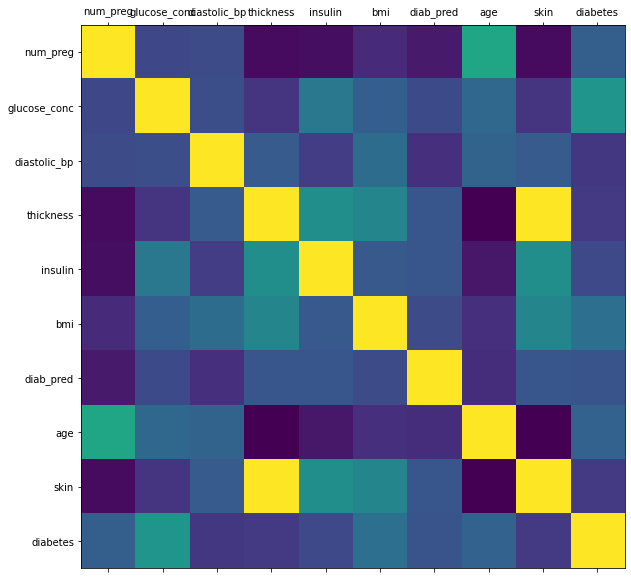

In [6]:
plot_corr(df)

In [7]:
#Definindo as classes
diabetes_map = {True: 1, False: 0}
df['diabetes'] = df['diabetes'].map(diabetes_map)
df

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,1.8912,0
764,2,122,70,27,0,36.8,0.340,27,1.0638,0
765,5,121,72,23,112,26.2,0.245,30,0.9062,0
766,1,126,60,0,0,30.1,0.349,47,0.0000,1


In [8]:
#Olhando para o dataframe podemos ver que as classes true e false foram substituidas por 1 e 0
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [9]:
#Verificando a distribuição dos dados
amount_true = len(df[df['diabetes'] == True])
amount_false = len(df[df['diabetes']== False])

percentual_true = 100*(amount_true / df['diabetes'].count())
percentual_false = 100*(amount_false / df['diabetes'].count())

print(f"Valores verdadeiros:\n Quantidade: {amount_true} Percentual: {percentual_true :2.2f}\n ")
print(f"Valores Falsos:\n Quantidade: {amount_false} Percentual: {percentual_false :2.2f}")

Valores verdadeiros:
 Quantidade: 268 Percentual: 34.90
 
Valores Falsos:
 Quantidade: 500 Percentual: 65.10


In [11]:
df = pd.get_dummies(df)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [12]:
#Seleção de variáveis preditoras(Feature Selection)
atributos = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']

In [13]:
# Variável a ser prevista
atributo_previsto = ['diabetes']

In [14]:
# Criando objetos
x = df[atributos].values
y = df[atributo_previsto].values

In [15]:
#Criando objeto IMPUTER, ele substitui os valores 0 por média dos valores

#preenche = Imputer(missing_values = 0, strategy = "mean", axis = 0)
preenche = SimpleImputer(missing_values=0, strategy='mean')

#Substitui o valores zeros pela média dos dados
x = preenche.fit_transform(x)


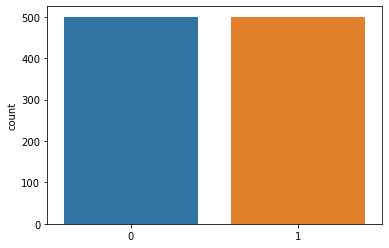

In [16]:
#realizando o balanceamento das classes utilizando 0 SMOTE. Criando dados sintéticos para a classe minoritaria.
smt = SMOTE()
x, y = smt.fit_sample(x, y)
ax = sns.countplot(x=y)

In [17]:
len(x)

1000

### Spliting
70% dados de treino e 30% de dados de teste.


In [174]:
# Definindo a taxa de split
split_test_size = 0.30

In [175]:
#Criando dados de treino e de teste
xtreino, xteste, ytreino, yteste = train_test_split(x, y, test_size = split_test_size, random_state = 42)

##  Mostrando os valores que possuem zeros no Dataframe

In [176]:
print("# Linhas no dataframe {0}".format(len(df)))
print("# Linhas missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("# Linhas missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("# Linhas missing thickness: {0}".format(len(df.loc[df['thickness'] == 0])))
print("# Linhas missing insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("# Linhas missing bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("# Linhas missing age: {0}".format(len(df.loc[df['age'] == 0])))

# Linhas no dataframe 768
# Linhas missing glucose_conc: 5
# Linhas missing diastolic_bp: 35
# Linhas missing thickness: 227
# Linhas missing insulin: 374
# Linhas missing bmi: 11
# Linhas missing age: 0


In [177]:
scaler = StandardScaler()  
scaler.fit(x)

x_train = scaler.transform(xtreino)  
x_test = scaler.transform(xteste) 

## Aplicando Gaussian Naive Bayes


In [178]:
#Criando um modelo preditivo, instanciando o objeto GaussianNB
modelo_nb = GaussianNB()

## Verificando a exatidão do modelo dos dados de treino


In [179]:
y_treino_pred_nb = cross_val_predict(modelo_nb, xtreino, ytreino.ravel(), cv = 4)
acuracia_nb = metrics.accuracy_score(ytreino, y_treino_pred_nb)
print(f'Acurácia do modelo: {acuracia_nb :.4f}')

Acurácia do modelo: 0.7129


### Verificando a exatidão do modelo dos dados de teste


In [180]:
y_test_pred_nb = cross_val_predict(modelo_nb, xteste, yteste.ravel(), cv = 6)

In [181]:
acuracia_nb_teste = metrics.accuracy_score(yteste, y_test_pred_nb)
print(f'Acurácia do modelo: {acuracia_nb_teste:.4f}')

Acurácia do modelo: 0.7400


In [182]:
matriz_confusao = metrics.confusion_matrix(yteste, y_test_pred_nb, labels = [1, 0])

relatorio = metrics.classification_report(yteste, y_test_pred_nb, labels = [1, 0])

In [183]:
## Criando uma matriz de confusão
print('Matriz de Confusão')
print("")
print(f"{matriz_confusao} \n")

print("\n Relatório")
print(f'{relatorio}')

Matriz de Confusão

[[109  42]
 [ 36 113]] 


 Relatório
              precision    recall  f1-score   support

           1       0.75      0.72      0.74       151
           0       0.73      0.76      0.74       149

    accuracy                           0.74       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.74      0.74      0.74       300



## Aplicando Random Forest

In [190]:
modelo_rf = RandomForestClassifier(max_depth=15, random_state = 42)

### Verificando a acurácia do modelo dos dados de treino

In [191]:
y_treino_pred_rf = cross_val_predict(modelo_rf, xtreino, ytreino, cv = 6)
acuracia_rf_treino = metrics.accuracy_score(ytreino, y_treino_pred_rf)
print(f'Acurácia do treino: {acuracia_rf_treino:.4f}')


Acurácia do treino: 0.8257


### Verificando a acurácia do modelo nos dados de testes

In [196]:
y_test_pred_rf = cross_val_predict(modelo_rf, xteste, yteste.ravel(), cv = 6)
acuracia_rf_test = metrics.accuracy_score(yteste, y_test_pred_rf)
print(f'Acurácia do teste: {acuracia_rf_test:.4f}')

Acurácia do teste: 0.7933


In [197]:
matrix_conf1 = metrics.confusion_matrix(yteste, y_test_pred_rf, labels = [1, 0])

report1 = metrics.classification_report(yteste, y_test_pred_rf, labels = [1, 0])

## Criando uma matriz de confusão
print('Confusion Matrix')
print("")
print(f"{matrix_conf1} \n")

print("\n Classification Report")
print(f'{report1}')

Confusion Matrix

[[122  29]
 [ 33 116]] 


 Classification Report
              precision    recall  f1-score   support

           1       0.79      0.81      0.80       151
           0       0.80      0.78      0.79       149

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300



## Aplicando Decision Tree

In [198]:
# Aplicando a Decision Tree e apresentando as métricas
modelo_dt = DecisionTreeClassifier(max_depth=12)

In [212]:
y_treino_pred_dt = cross_val_predict(modelo_dt, xtreino, ytreino, cv = 5)
acuracia_dt_treino = metrics.accuracy_score(ytreino, y_treino_pred_rf)
print(f'Acurácia do treino: {acuracia_rf_treino:.4f}')


Acurácia do treino: 0.8257


In [216]:
y_teste_pred_dt = cross_val_predict(modelo_dt, xteste, yteste, cv = 5)
acuracia_dt_teste = metrics.accuracy_score(yteste, y_teste_pred_dt)
print(f'Acurácia do teste: {acuracia_dt_teste:.4f}')


Acurácia do teste: 0.7233


In [125]:
matrix_conf1 = metrics.confusion_matrix(yteste, y_teste_pred_dt, labels = [1, 0])

report1 = metrics.classification_report(yteste, y_teste_pred_dt, labels = [1, 0])

## Criando uma matriz de confusão
print('Confusion Matrix')
print("")
print(f"{matrix_conf1} \n")

print("\n Classification Report")
print(f'{report1}')

Confusion Matrix

[[108  43]
 [ 39 110]] 


 Classification Report
              precision    recall  f1-score   support

           1       0.73      0.72      0.72       151
           0       0.72      0.74      0.73       149

    accuracy                           0.73       300
   macro avg       0.73      0.73      0.73       300
weighted avg       0.73      0.73      0.73       300

